<a href="https://colab.research.google.com/github/MUmairAB/Twitter-Sentiment-Analysis/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

Our data is not in clean form. It needs some data cleaning.

Then it needs to be manipulated for natural language processing.

In [2]:
# Loading csv file containing tweets data
tweets = pd.read_csv('/tweets_data2.csv')
tweets.shape

FileNotFoundError: ignored

In [78]:
print(f'Data has:\n\t{tweets.shape[0]} rows\n\t{tweets.shape[1]} columns')

Data has:
	30010 rows
	7 columns


# Data Cleaning

In [79]:
tweets.reset_index(drop=True,inplace=True)
# Looking at the data
tweets.head()

,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language
0,2023-02-27 15:01:00+00:00,1630221468477816838,"ICYMI: In Pennsylvania, a school district canc...",PENamerica,0,0,en
1,2023-02-27 15:00:57+00:00,1630221455450427394,If action is not taken now to tackle #climate ...,circleofblue,0,0,en
2,2023-02-27 15:00:56+00:00,1630221451646357504,Let's Collaborate\nhttps://t.co/CcJJvbeL2Z \n#...,WriteCanvas,0,0,en
3,2023-02-27 15:00:51+00:00,1630221428661407744,"As climate change affects ecosystems, one spec...",TheDailyClimate,0,0,en
4,2023-02-27 15:00:47+00:00,1630221411980656640,"Mar 2 @ 11am ET, join us for a virtual science...",caryinstitute,0,0,en


In [80]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30010 entries, 0 to 30009
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Datetime          30010 non-null  object
 1   Tweeter Id        30010 non-null  int64 
 2   Content           30010 non-null  object
 3   Twitter Username  30010 non-null  object
 4   Likes             30010 non-null  int64 
 5   No of Retweets    30010 non-null  int64 
 6   Tweet Language    30010 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [81]:
# Selecting "english" tweets
tweets = tweets[tweets['Tweet Language'] == 'en']

In [82]:
# Check for NULL values
tweets.isnull().sum()

Datetime            0
Tweeter Id          0
Content             0
Twitter Username    0
Likes               0
No of Retweets      0
Tweet Language      0
dtype: int64

In [83]:
# Copy of the original DataFrame for future usage
tweets_copy = tweets.copy()

In [84]:
# Check for duplicate tweets
print('Number of duplicate tweets INCLUDING the retweets: ',end='')
print(tweets['Content'].duplicated().sum())
# The above statement will give the number of duplicate tweets INCLUDING the retweets.

print('Number of duplicate tweets EXCLUDING the retweets: ',end='')
print(tweets.duplicated().sum())
# The above statement will give the number of duplicate tweets EXCLUDING the retweets.

Number of duplicate tweets INCLUDING the retweets: 25635
Number of duplicate tweets EXCLUDING the retweets: 25088


**For a better understanding of sentiments about the climate change, we will keep the retweets. So that we can know that whether people are retweeting the pro-climate tweets or anti-climate tweets.**

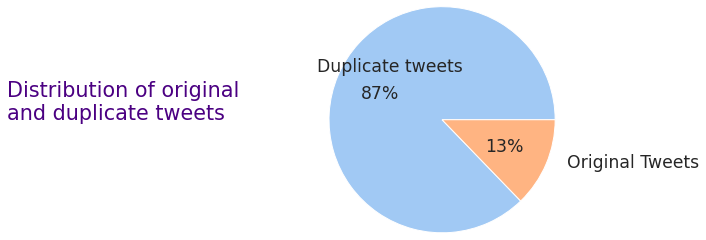

In [85]:
# Let's plot a pie plot to see the duplicate and original tweets distribution 
# length of duplicate tweets
n_dup = tweets.duplicated().sum()

# length of original tweets
n_org = tweets.shape[0] - tweets.duplicated().sum()

c=sns.color_palette('pastel')[0:2]
plt.pie(x=[n_dup,n_org],
        labels = ['Duplicate tweets','Original Tweets\n'],colors=c,radius=1.3,
        center=(6,0), autopct='%.0f%%',
        textprops ={"size":"x-large"},labeldistance=1.2);

plt.text(1,0,s="Distribution of original\nand duplicate tweets",
        color="indigo",size="xx-large");
plt.savefig('pie chart.png',bbox_inches='tight')

The amount of duplicate tweets shows usage of spam accounts and chat bots to shape the narrative, and amplify a trend on Twitter.

## **In near future, I will try to investigate whether these chat bots are used to shape the pro climate change narrative or anti climate change narrative.**

In [86]:
# Let's look at a few duplicate tweets
tweets = tweets.drop_duplicates().reset_index(drop=True)
print(tweets.shape)
tweets.head()

(3672, 7)


,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language
0,2023-02-27 15:01:00+00:00,1630221468477816838,"ICYMI: In Pennsylvania, a school district canc...",PENamerica,0,0,en
1,2023-02-27 15:00:57+00:00,1630221455450427394,If action is not taken now to tackle #climate ...,circleofblue,0,0,en
2,2023-02-27 15:00:56+00:00,1630221451646357504,Let's Collaborate\nhttps://t.co/CcJJvbeL2Z \n#...,WriteCanvas,0,0,en
3,2023-02-27 15:00:51+00:00,1630221428661407744,"As climate change affects ecosystems, one spec...",TheDailyClimate,0,0,en
4,2023-02-27 15:00:47+00:00,1630221411980656640,"Mar 2 @ 11am ET, join us for a virtual science...",caryinstitute,0,0,en


# NLP
Since we have done the initial data cleaning, we can move on to further processing of the data.

This processing involves:
*   Removal of all links and special characters from the tweets
*   Tokenization and removal of stopwords
*   Lemmatization of the words of tweets

To do this, we'll use **Natural Language Toolkit (NLTK)**. It is a very popular suite of libraries and programs used for statistical natural language processing for English language.


In [87]:
# Importing NLTK and other standard libraries
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [88]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
#stopword=set(stopwords.words('english'))
stopword=stopwords.words('english')
# Stop words don't carry much useful information in them.
# Thus, they will be removed from the tweets for further analysis 
sw_extend = ('climate', 'change','global', 'warming','climate action','environment',
             'environmental change','weather','earth','nature','extreme','wildfire')
stopword.extend(sw_extend)
def tweet_cleaner(twt):
    # lowercase the tweet words
    twt = str(twt).lower()

    # Removing punctuation and external links
    twt = re.sub('\[.*?\]', '', twt)
    twt = re.sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", twt)
    twt = re.sub('https?://\S+|www\.\S+', '', twt)
    twt = re.sub('<.*?>+', '', twt)
    twt = re.sub('[%s]' % re.escape(string.punctuation), '', twt)
    twt = re.sub('\n', '', twt)
    twt = re.sub('\w*\d\w*', '', twt)
    twt = re.sub(r"\s{2,}", " ", twt)
    twt = re.sub(r"'", " ", twt)
    twt = re.sub(r":", " : ", twt)
    twt = re.sub(r"#", " ", twt)

    # Removing stop words
    twt = [word for word in twt.split(' ') if word not in stopword]
    twt=" ".join(twt)

    # Lemmatization of the words
    twt = [lemmatizer.lemmatize(word) for word in twt.split(' ')]
    twt=" ".join(twt)
    return twt
tweets["Content"] = tweets["Content"].apply(tweet_cleaner)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
tweets.head()

,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language
0,2023-02-27 15:01:00+00:00,1630221468477816838,icymi pennsylvania school district cancelled m...,PENamerica,0,0,en
1,2023-02-27 15:00:57+00:00,1630221455450427394,action taken tackle climate change european co...,circleofblue,0,0,en
2,2023-02-27 15:00:56+00:00,1630221451646357504,let collaborate http carbonneutral climatechan...,WriteCanvas,0,0,en
3,2023-02-27 15:00:51+00:00,1630221428661407744,climate change affect ecosystem one specie may...,TheDailyClimate,0,0,en
4,2023-02-27 15:00:47+00:00,1630221411980656640,mar et join u virtual science seminar umasslow...,caryinstitute,0,0,en


# Word Cloud
It is nice to plot a word cloud to get the glimpse of the frequently used used in tweets.

For that, we'll use **wordcloud** library.

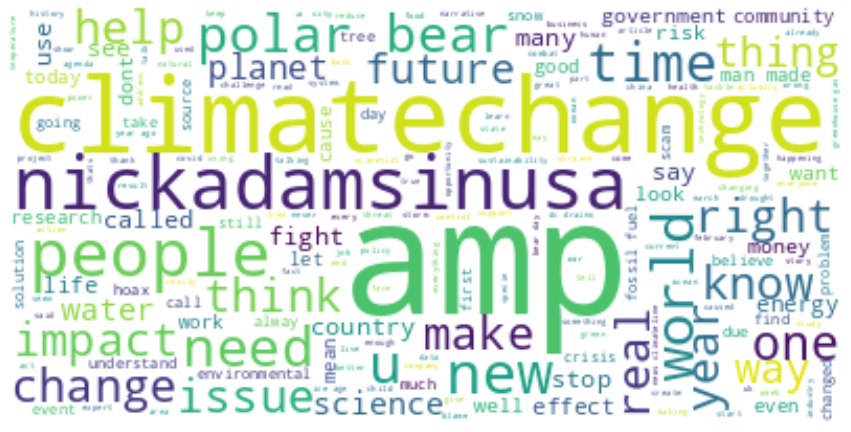

In [89]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
text = " ".join(i for i in tweets['Content'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word cloud.png')

# Text Vectorization
Finally, we'll do the text vectorization. This is done to transform all the text tokens into numerical vectors.

To perform this operation, there are two ways:
* **CountVectorizer()** — the raw word counts often lead to features that put too much weight on words that appear very frequently. This might cause anomalies.
* **TF–IDF vectorizer()** — term frequency–inverse document frequency (TF–IDF), weights the word counts by a measure of how often they appear in the documents.

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

If we use the default values of **TfidfVectorizer()** utility, our sparse matrix (output) will consider all words, even back slang or misspells. In order to avoid it, we'll fine tune it. 

We will not include words that occur over 80% times in our document corpus. 
We will also ignore the words that occur fewer than twice in our document corpus.

In [98]:
vec = TfidfVectorizer(max_df=0.80, min_df=2,smooth_idf=True)
X = vec.fit_transform(tweets['Content'])

In [99]:
X

<3672x5093 sparse matrix of type '<class 'numpy.float64'>'
	with 48682 stored elements in Compressed Sparse Row format>

In [100]:
# X is a sparse matrix. we can convert it to a DataFrame as follows
X_df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
X_df

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aadimahotsav,aae,aajtak,abc,abdulla,ability,able,abnormal,abortion,absolute,...,zealot,zee,zero,zerowaste,zim,zone,zonnepanelen,zoo,zoom,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
X_df.shape

(3672, 5093)

# Sentiment Analysis
For sentiment analysis of unlabelled data, we need to use a pre-trained model. There are two popular options:
* **Textblob**
* **Vader**

For social media related sentiment analysis where text contains slang words, empjis and a lot of new Gen Z slang terms, Vader is highly recomended.

In [103]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.2 MB/s eta 0:00:00


In [104]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [114]:

"""new_words = {
    'cpos': -3.0,
    'cneg': 3.0,
}"""
analyzer = SentimentIntensityAnalyzer()
#sentiments.lexicon.update(new_words)
scores=list()
sentiment=list()
tweets['Sentiment'] = '' # Creating a sentiment column in DataFrame

for i in range(tweets.shape[0]):
    score = analyzer.polarity_scores(tweets['Content'][i])['compound']
    scores.append(score)

    if score>=0.75:
        tweets['Sentiment'][i] = 'Overly Positive'
    elif (score>=0.05) and (score<0.75):
        tweets['Sentiment'][i] = 'Positive'
    elif score<=(-0.75):
        tweets['Sentiment'][i] = 'Overly Negative'
    elif (score<=-0.05) and (score>-0.75):
        tweets['Sentiment'][i] = 'Negative'
    else:
        tweets['Sentiment'][i] = 'Neutral'

<ipython-input-114-bf08bdfbf21e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Sentiment'][i] = 'Positive'
<ipython-input-114-bf08bdfbf21e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Sentiment'][i] = 'Overly Negative'
<ipython-input-114-bf08bdfbf21e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Sentiment'][i] = 'Overly Positive'
<ipython-input-114-bf08bdfbf21e>:22: SettingWithCopyWarning: 
A valu

In [116]:
tweets.head()

,Datetime,Tweeter Id,Content,Twitter Username,Likes,No of Retweets,Tweet Language,sentiment,Sentiments11,Sentiment
0,2023-02-27 15:01:00+00:00,1630221468477816838,icymi pennsylvania school district cancelled m...,PENamerica,0,0,en,Positive,,Positive
1,2023-02-27 15:00:57+00:00,1630221455450427394,action taken tackle european commission chief ...,circleofblue,0,0,en,Overly Negative,,Overly Negative
2,2023-02-27 15:00:56+00:00,1630221451646357504,let collaborate http carbonneutral climatechan...,WriteCanvas,0,0,en,Positive,,Positive
3,2023-02-27 15:00:51+00:00,1630221428661407744,affect ecosystem one specie may benefit effect...,TheDailyClimate,0,0,en,Positive,,Positive
4,2023-02-27 15:00:47+00:00,1630221411980656640,mar et join u virtual science seminar umasslow...,caryinstitute,0,0,en,Overly Positive,,Overly Positive


In [ ]:
tweets['Sentiment'].value_counts()

In [113]:
#twt11 = tweets.copy()

In [118]:
np.sum(tweets['Sentiment'] == twt11['Sentiment'])

KeyError: ignored

In [ ]:
'Sentiment' in 

In [ ]:
"""from nltk.tokenize import word_tokenize, RegexpTokenizer

import pandas as pd

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()


sentence = news['title'][5]

tokenized_sentence = nltk.word_tokenize(sentence)"""
Overly_Positivepos_words = list()
Positive_words = list()
Neutral_words = list()
Negative_words = list()
Overly_Negative_words = list()

for tweet in tweets['Content']:
    for word in tweet:
        scr = analyzer.polarity_scores(word)['compound']
        if scr >= 0.75:
            Overly_Positivepos_words.append(word)
        elif scr:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)                

 elif :
        sentiment.append('Positive')
    elif i<=(-0.75):
        sentiment.append('Overly Negative')
    elif (i<=-0.05) and (i>-0.75):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')

print('Positive:',pos_word_list)
print('Neutral:',neu_word_list)
print('Negative:',neg_word_list) 
score = analyzer.polarity_scores(sentence)
print('\nScores:', score)